## EDA y Preprocesamiento - Detección de Comentarios Tóxicos en YouTube

**🎯 Objetivo del Proyecto**

YouTube busca una solución automática para detectar comentarios de odio y toxicidad en su plataforma. Necesitamos desarrollar un modelo de Machine Learning que pueda clasificar comentarios como tóxicos o no tóxicos de manera eficiente y escalable.

**📋 Planteamiento del Problema**

- **Problema:** Aumento de mensajes de odio en comentarios de YouTube
- **Solución necesaria:** Detección automática de comentarios tóxicos
- **Prioridad:** Implementación práctica sobre precisión extrema
- **Escalabilidad:** Debe manejar el volumen creciente de la plataforma

## 📚 Importación de Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Librerías para procesamiento de texto
import re
import string
from wordcloud import WordCloud

# Librerías de NLP
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Librerías de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Descargar recursos de NLTK necesarios
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Marie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Marie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Marie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## 📊 Carga y Exploración Inicial de Datos

In [5]:
df = pd.read_csv('../data/youtoxic_english_1000.csv')

print("🔍 INFORMACIÓN BÁSICA DEL DATASET")
print("=" * 50)
print(f"Forma del dataset: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print(f"Tipos de datos:\n{df.dtypes}")
print(f"Valores nulos por columna:\n{df.isnull().sum()}")

print("\n📋 PRIMERAS 3 FILAS:")
print(df.head(3))

🔍 INFORMACIÓN BÁSICA DEL DATASET
Forma del dataset: (1000, 15)
Columnas: ['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']
Tipos de datos:
CommentId          object
VideoId            object
Text               object
IsToxic              bool
IsAbusive            bool
IsThreat             bool
IsProvocative        bool
IsObscene            bool
IsHatespeech         bool
IsRacist             bool
IsNationalist        bool
IsSexist             bool
IsHomophobic         bool
IsReligiousHate      bool
IsRadicalism         bool
dtype: object
Valores nulos por columna:
CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0


## 📈 Análisis Exploratorio de Datos (EDA)

### Distribución de Variables Target

🔍 ANÁLISIS DE COLUMNAS:
✅ IsToxic         - Tiene ambos valores: [False  True]
✅ IsAbusive       - Tiene ambos valores: [False  True]
✅ IsThreat        - Tiene ambos valores: [False  True]
✅ IsProvocative   - Tiene ambos valores: [False  True]
✅ IsObscene       - Tiene ambos valores: [False  True]
✅ IsHatespeech    - Tiene ambos valores: [False  True]
✅ IsRacist        - Tiene ambos valores: [False  True]
✅ IsNationalist   - Tiene ambos valores: [False  True]
✅ IsSexist        - Tiene ambos valores: [False  True]
❌ IsHomophobic    - Solo tiene: [False]
✅ IsReligiousHate - Tiene ambos valores: [False  True]
❌ IsRadicalism    - Solo tiene: [False]

📊 Columnas válidas para graficar: 10
🚫 Columnas excluidas: 2

Columnas excluidas: IsHomophobic, IsRadicalism


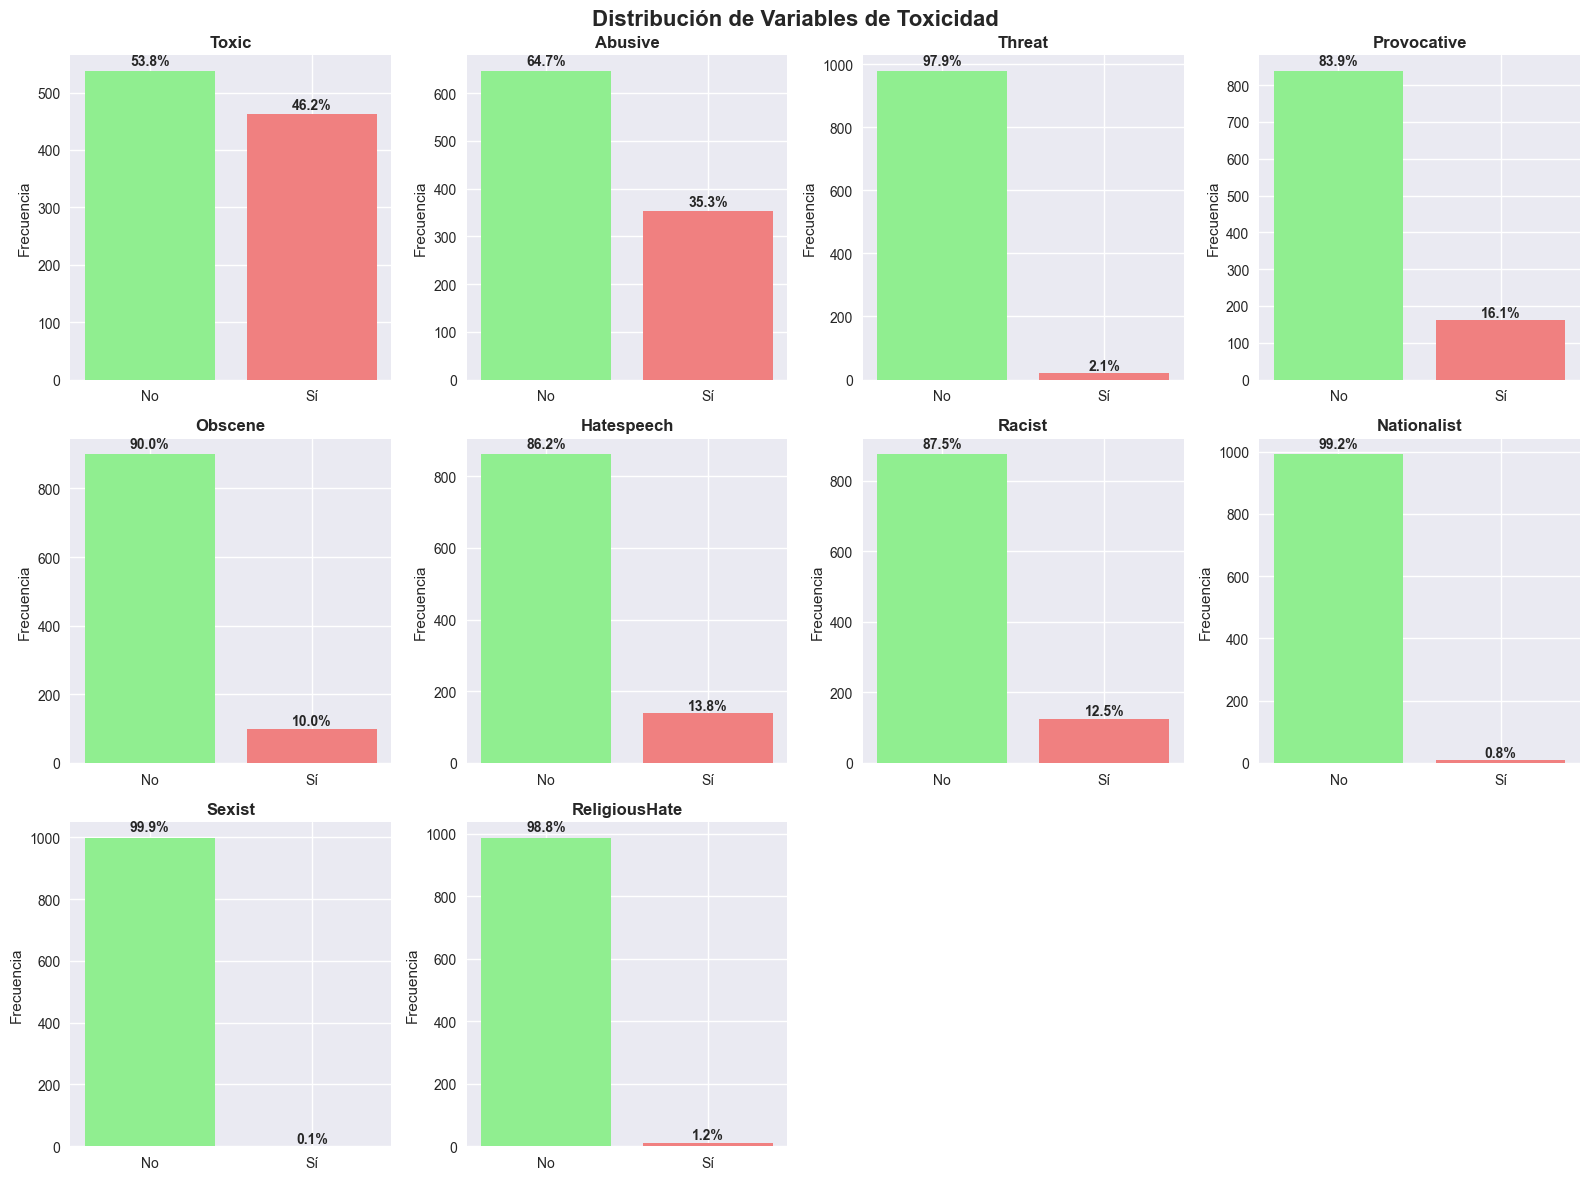


📊 RESUMEN DE DISTRIBUCIONES:
📊 IsToxic         | Sí: 462 ( 46.2%) | No: 538 ( 53.8%)
📊 IsAbusive       | Sí: 353 ( 35.3%) | No: 647 ( 64.7%)
📊 IsThreat        | Sí:  21 (  2.1%) | No: 979 ( 97.9%)
📊 IsProvocative   | Sí: 161 ( 16.1%) | No: 839 ( 83.9%)
📊 IsObscene       | Sí: 100 ( 10.0%) | No: 900 ( 90.0%)
📊 IsHatespeech    | Sí: 138 ( 13.8%) | No: 862 ( 86.2%)
📊 IsRacist        | Sí: 125 ( 12.5%) | No: 875 ( 87.5%)
📊 IsNationalist   | Sí:   8 (  0.8%) | No: 992 ( 99.2%)
📊 IsSexist        | Sí:   1 (  0.1%) | No: 999 ( 99.9%)
⚠️ IsHomophobic    | Sí:   0 (  0.0%) | No: 1000 (100.0%)
📊 IsReligiousHate | Sí:  12 (  1.2%) | No: 988 ( 98.8%)
⚠️ IsRadicalism    | Sí:   0 (  0.0%) | No: 1000 (100.0%)

⚠️  Nota: Las columnas marcadas con ⚠️  no aparecen en el gráfico porque solo tienen un valor único.


In [6]:
toxicity_columns = [
    'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
    'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist',
    'IsHomophobic', 'IsReligiousHate', 'IsRadicalism'
]

# Verificar qué columnas tienen ambos valores (True/False)
print("🔍 ANÁLISIS DE COLUMNAS:")
print("=" * 60)
valid_columns = []
excluded_columns = []

for col in toxicity_columns:
    unique_values = df[col].unique()
    if len(unique_values) == 2:
        valid_columns.append(col)
        print(f"✅ {col:15} - Tiene ambos valores: {unique_values}")
    else:
        excluded_columns.append(col)
        print(f"❌ {col:15} - Solo tiene: {unique_values}")

print(f"\n📊 Columnas válidas para graficar: {len(valid_columns)}")
print(f"🚫 Columnas excluidas: {len(excluded_columns)}")

if excluded_columns:
    print(f"\nColumnas excluidas: {', '.join(excluded_columns)}")

# Crear visualización solo para columnas con dos valores
if valid_columns:
    n_cols = len(valid_columns)
    n_rows = (n_cols + 3) // 4  
    n_cols_grid = min(4, n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols_grid, figsize=(16, 4*n_rows))
    fig.suptitle('Distribución de Variables de Toxicidad', fontsize=16, fontweight='bold')
    
    # Si solo hay una fila, asegurar que axes sea un array
    if n_rows == 1:
        axes = axes.reshape(1, -1) if n_cols_grid > 1 else [[axes]]
    elif n_cols_grid == 1:
        axes = axes.reshape(-1, 1)
    
    for i, col in enumerate(valid_columns):
        row = i // 4
        col_idx = i % 4
        
        counts = df[col].value_counts()
        ax = axes[row, col_idx]
        
        # Acceso seguro a los conteos
        no_count = counts.get(False, 0)
        yes_count = counts.get(True, 0)
        
        # Gráfico de barras
        bars = ax.bar(['No', 'Sí'], [no_count, yes_count],
                      color=['lightgreen', 'lightcoral'])
        ax.set_title(col.replace('Is', ''), fontweight='bold')
        ax.set_ylabel('Frecuencia')
        
        # Añadir porcentajes
        total = len(df)
        for j, (bar, count) in enumerate(zip(bars, [no_count, yes_count])):
            height = bar.get_height()
            percentage = (height / total) * 100
            ax.text(bar.get_x() + bar.get_width()/2., height + max(height*0.01, 1),
                    f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # Ocultar subplots vacíos si los hay
    for i in range(len(valid_columns), n_rows * n_cols_grid):
        row = i // 4
        col_idx = i % 4
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ No hay columnas válidas para graficar (todas tienen un solo valor único)")

# Tabla resumen de distribuciones (para TODAS las columnas)
print("\n📊 RESUMEN DE DISTRIBUCIONES:")
print("=" * 70)
for col in toxicity_columns:
    true_count = df[col].sum()
    false_count = len(df) - true_count
    true_pct = (true_count / len(df)) * 100
    
    # Indicar si la columna fue excluida del gráfico
    status = "📊" if col in valid_columns else "⚠️"
    print(f"{status} {col:15} | Sí: {true_count:3d} ({true_pct:5.1f}%) | No: {false_count:3d} ({100-true_pct:5.1f}%)")

if excluded_columns:
    print(f"\n⚠️  Nota: Las columnas marcadas con ⚠️  no aparecen en el gráfico porque solo tienen un valor único.")

### Análisis de Texto

📝 ESTADÍSTICAS DE TEXTO:
Longitud promedio: 185.6 caracteres
Longitud mediana: 101.0 caracteres
Longitud mínima: 3 caracteres
Longitud máxima: 4421 caracteres
Palabras promedio: 33.8


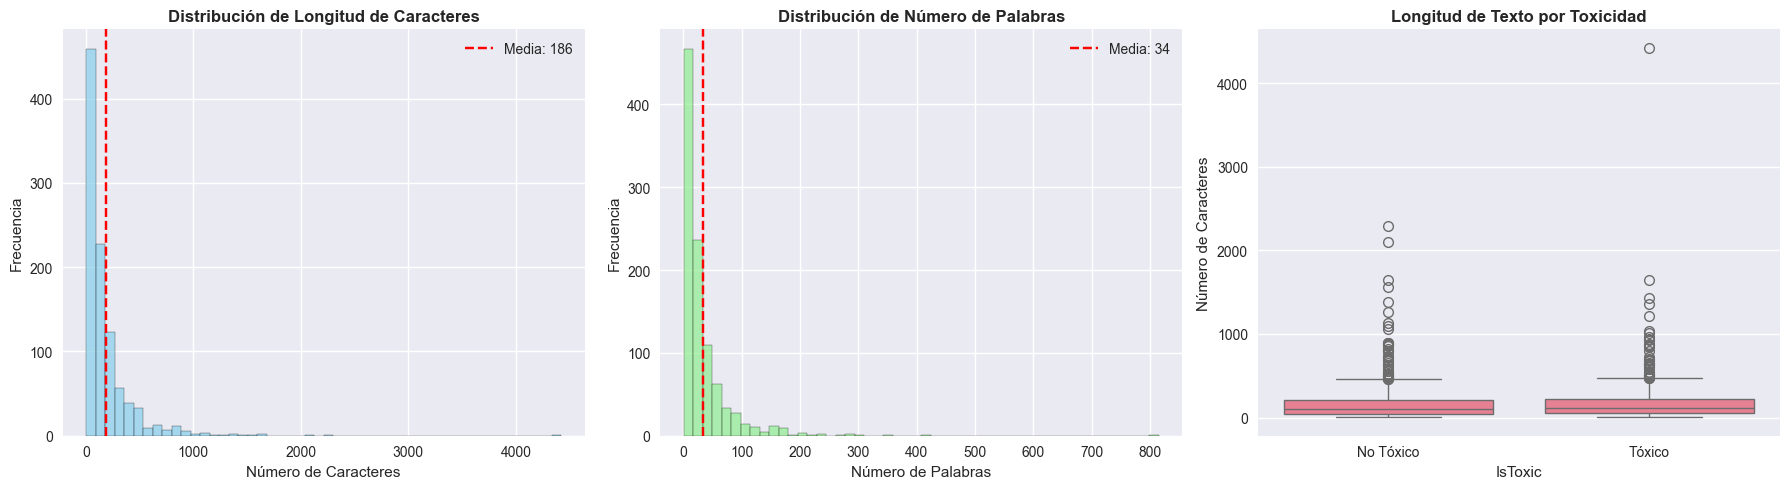

In [7]:
# Estadísticas de longitud de texto
df['text_length'] = df['Text'].str.len()
df['word_count'] = df['Text'].str.split().str.len()

# Estadísticas descriptivas
print("📝 ESTADÍSTICAS DE TEXTO:")
print("=" * 40)
print(f"Longitud promedio: {df['text_length'].mean():.1f} caracteres")
print(f"Longitud mediana: {df['text_length'].median():.1f} caracteres")
print(f"Longitud mínima: {df['text_length'].min()} caracteres")
print(f"Longitud máxima: {df['text_length'].max()} caracteres")
print(f"Palabras promedio: {df['word_count'].mean():.1f}")

# Visualización de distribuciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma de longitud de caracteres
axes[0].hist(df['text_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Distribución de Longitud de Caracteres', fontweight='bold')
axes[0].set_xlabel('Número de Caracteres')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(df['text_length'].mean(), color='red', linestyle='--', label=f'Media: {df["text_length"].mean():.0f}')
axes[0].legend()

# Histograma de número de palabras
axes[1].hist(df['word_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribución de Número de Palabras', fontweight='bold')
axes[1].set_xlabel('Número de Palabras')
axes[1].set_ylabel('Frecuencia')
axes[1].axvline(df['word_count'].mean(), color='red', linestyle='--', label=f'Media: {df["word_count"].mean():.0f}')
axes[1].legend()

# Boxplot comparativo por toxicidad
df_plot = df[['text_length', 'IsToxic']].copy()
df_plot['IsToxic'] = df_plot['IsToxic'].map({True: 'Tóxico', False: 'No Tóxico'})
sns.boxplot(data=df_plot, x='IsToxic', y='text_length', ax=axes[2])
axes[2].set_title('Longitud de Texto por Toxicidad', fontweight='bold')
axes[2].set_ylabel('Número de Caracteres')

plt.tight_layout()
plt.show()

**Longitud de texto:**

- Los comentarios tóxicos pueden tener patrones de longitud diferentes
- **Distribución:** Entender la variabilidad en el dataset
- **Comparación por toxicidad:** Ver si hay diferencias en longitud entre comentarios tóxicos y no tóxicos

### Análisis de Correlaciones

🔍 ANÁLISIS DE VARIABILIDAD:
✅ IsToxic         - Valores únicos: [False  True], Varianza: 0.2488
✅ IsAbusive       - Valores únicos: [False  True], Varianza: 0.2286
✅ IsThreat        - Valores únicos: [False  True], Varianza: 0.0206
✅ IsProvocative   - Valores únicos: [False  True], Varianza: 0.1352
✅ IsObscene       - Valores únicos: [False  True], Varianza: 0.0901
✅ IsHatespeech    - Valores únicos: [False  True], Varianza: 0.1191
✅ IsRacist        - Valores únicos: [False  True], Varianza: 0.1095
✅ IsNationalist   - Valores únicos: [False  True], Varianza: 0.0079
✅ IsSexist        - Valores únicos: [False  True], Varianza: 0.0010
❌ IsHomophobic    - Solo tiene: [False], Varianza: 0.0000
✅ IsReligiousHate - Valores únicos: [False  True], Varianza: 0.0119
❌ IsRadicalism    - Solo tiene: [False], Varianza: 0.0000

📊 Variables con variación: 10
🚫 Variables constantes: 2

Variables constantes (no se pueden correlacionar): IsHomophobic, IsRadicalism


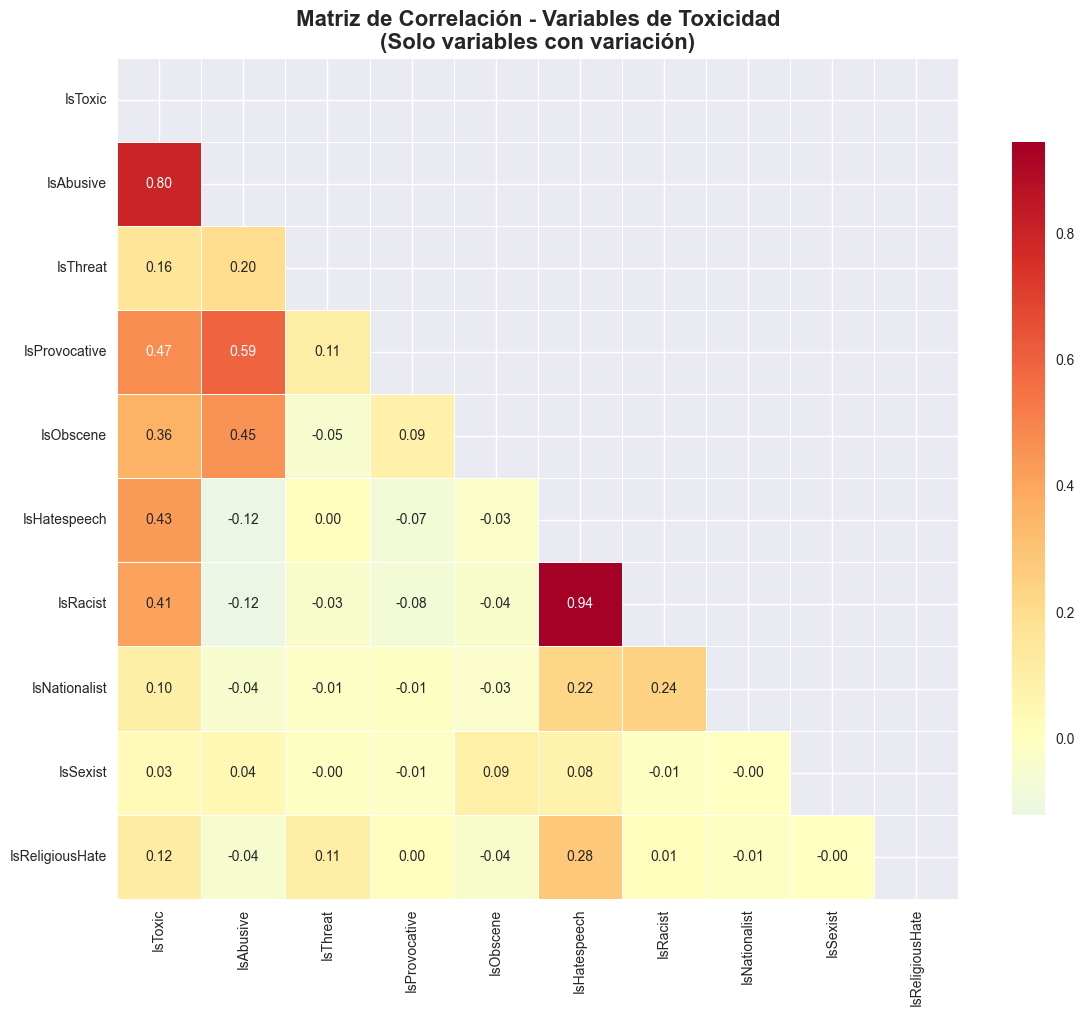


🔗 CORRELACIONES MÁS ALTAS:
 1. IsHatespeech ↔ IsRacist:  0.945 🔴 Fuerte
 2. IsToxic ↔ IsAbusive:  0.797 🔴 Fuerte
 3. IsAbusive ↔ IsProvocative:  0.593 🟡 Moderada
 4. IsToxic ↔ IsProvocative:  0.473 🟡 Moderada
 5. IsAbusive ↔ IsObscene:  0.451 🟡 Moderada
 6. IsToxic ↔ IsHatespeech:  0.432 🟡 Moderada
 7. IsToxic ↔ IsRacist:  0.408 🟡 Moderada
 8. IsToxic ↔ IsObscene:  0.360 🟡 Moderada
 9. IsHatespeech ↔ IsReligiousHate:  0.275 🟢 Débil
10. IsRacist ↔ IsNationalist:  0.238 🟢 Débil

📊 RESUMEN ESTADÍSTICO:
Total de correlaciones calculadas: 45
Correlación promedio (valor absoluto): 0.158
Correlación más alta: 0.945
Correlación más baja: 0.002

Distribución por fuerza:
  🔴 Correlaciones fuertes (≥0.7): 2
  🟡 Correlaciones moderadas (0.3-0.7): 6
  🟢 Correlaciones débiles (<0.3): 37

📋 RESUMEN COMPLETO DE VARIABLES:
📊 Variable | IsToxic         | Sí: 462 ( 46.2%) | No: 538 ( 53.8%)
📊 Variable | IsAbusive       | Sí: 353 ( 35.3%) | No: 647 ( 64.7%)
📊 Variable | IsThreat        | Sí:  21 (  2.1%)

In [8]:
toxicity_columns = [
    'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
    'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist',
    'IsHomophobic', 'IsReligiousHate', 'IsRadicalism'
]

# Analizar variabilidad de cada columna
print("🔍 ANÁLISIS DE VARIABILIDAD:")
print("=" * 60)
variable_columns = []
constant_columns = []

for col in toxicity_columns:
    unique_vals = df[col].unique()
    variance = df[col].var()
    
    if len(unique_vals) > 1 and variance > 0:
        variable_columns.append(col)
        print(f"✅ {col:15} - Valores únicos: {unique_vals}, Varianza: {variance:.4f}")
    else:
        constant_columns.append(col)
        print(f"❌ {col:15} - Solo tiene: {unique_vals}, Varianza: {variance:.4f}")

print(f"\n📊 Variables con variación: {len(variable_columns)}")
print(f"🚫 Variables constantes: {len(constant_columns)}")

if constant_columns:
    print(f"\nVariables constantes (no se pueden correlacionar): {', '.join(constant_columns)}")

# Matriz de correlación solo para variables con variación
if len(variable_columns) >= 2:
    correlation_matrix = df[variable_columns].corr()
    
    # Visualización mejorada
    plt.figure(figsize=(12, 10))
    
    # Crear máscara triangular superior
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Crear heatmap
    sns.heatmap(correlation_matrix,
                mask=mask,
                annot=True,
                cmap='RdYlBu_r',
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8},
                linewidths=0.5)
    
    plt.title('Matriz de Correlación - Variables de Toxicidad\n(Solo variables con variación)', 
              fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    #Top correlaciones
    print("\n🔗 CORRELACIONES MÁS ALTAS:")
    print("=" * 50)
    
    # Crear lista de correlaciones (excluyendo diagonal)
    correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if not np.isnan(corr_value):  # Excluir NaN
                correlations.append((correlation_matrix.columns[i], 
                                   correlation_matrix.columns[j], corr_value))
    
    # Ordenar por valor absoluto de correlación
    correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Mostrar correlaciones
    for i, (var1, var2, corr) in enumerate(correlations[:10], 1):
        strength = "🔴 Fuerte" if abs(corr) >= 0.7 else "🟡 Moderada" if abs(corr) >= 0.3 else "🟢 Débil"
        print(f"{i:2d}. {var1} ↔ {var2}: {corr:6.3f} {strength}")
    
    # Resumen estadístico
    print(f"\n📊 RESUMEN ESTADÍSTICO:")
    print("=" * 50)
    print(f"Total de correlaciones calculadas: {len(correlations)}")
    
    if correlations:
        correlations_values = [abs(corr[2]) for corr in correlations]
        print(f"Correlación promedio (valor absoluto): {np.mean(correlations_values):.3f}")
        print(f"Correlación más alta: {max(correlations_values):.3f}")
        print(f"Correlación más baja: {min(correlations_values):.3f}")
        
        # Contar por fuerza
        strong = sum(1 for corr in correlations_values if corr >= 0.7)
        moderate = sum(1 for corr in correlations_values if 0.3 <= corr < 0.7)
        weak = sum(1 for corr in correlations_values if corr < 0.3)
        
        print(f"\nDistribución por fuerza:")
        print(f"  🔴 Correlaciones fuertes (≥0.7): {strong}")
        print(f"  🟡 Correlaciones moderadas (0.3-0.7): {moderate}")
        print(f"  🟢 Correlaciones débiles (<0.3): {weak}")

else:
    print("❌ No hay suficientes variables con variación para calcular correlaciones")

# Tabla resumen de todas las variables
print(f"\n📋 RESUMEN COMPLETO DE VARIABLES:")
print("=" * 70)
for col in toxicity_columns:
    true_count = df[col].sum()
    false_count = len(df) - true_count
    true_pct = (true_count / len(df)) * 100
    
    # Indicar estado
    if col in variable_columns:
        status = "📊 Variable"
    else:
        status = "⚠️  Constante"
    
    print(f"{status} | {col:15} | Sí: {true_count:3d} ({true_pct:5.1f}%) | No: {false_count:3d} ({100-true_pct:5.1f}%)")

## 🧹 Preprocesamiento de Datos
### Limpieza Básica de Texto

In [9]:
def clean_text_basic(text):
    """
    Limpieza básica de texto
    - Convierte a minúsculas
    - Elimina caracteres especiales
    - Elimina espacios extra
    """
    if pd.isna(text):
        return ""
    
    # Convertir a string y minúsculas
    text = str(text).lower()
    
    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Eliminar menciones y hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    
    # Eliminar caracteres especiales pero mantener espacios
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Eliminar espacios múltiples
    text = re.sub(r'\s+', ' ', text)
    
    # Eliminar espacios al inicio y final
    text = text.strip()
    
    return text

# Aplicar limpieza básica
df['text_cleaned'] = df['Text'].apply(clean_text_basic)

# Mostrar ejemplos de limpieza
print("🧹 EJEMPLOS DE LIMPIEZA BÁSICA:")
print("=" * 50)
for i in range(3):
    print(f"Original: {df['Text'].iloc[i][:100]}...")
    print(f"Limpio:   {df['text_cleaned'].iloc[i][:100]}...")
    print("-" * 50)

🧹 EJEMPLOS DE LIMPIEZA BÁSICA:
Original: If only people would just take a step back and not make this case about them, because it wasn't abou...
Limpio:   if only people would just take a step back and not make this case about them because it wasnt about ...
--------------------------------------------------
Original: Law enforcement is not trained to shoot to apprehend.  They are trained to shoot to kill.  And I tha...
Limpio:   law enforcement is not trained to shoot to apprehend they are trained to shoot to kill and i thank w...
--------------------------------------------------
Original: 
Dont you reckon them 'black lives matter' banners being held by white cunts is  kinda patronizing a...
Limpio:   dont you reckon them black lives matter banners being held by white cunts is kinda patronizing and i...
--------------------------------------------------


**¿Por qué esta limpieza?**

 - **URLs y menciones:** No aportan valor semántico para clasificación
 - **Números:** Generalmente no son relevantes para toxicidad
 - **Caracteres especiales:** Pueden introducir ruido en el modelo
 - **Normalización:** Minúsculas para consistencia

### Eliminación de Stopwords

In [10]:
# Cargar stopwords en inglés
stop_words = set(stopwords.words('english'))

# Añadir stopwords personalizadas si es necesario
custom_stopwords = {'youtube', 'video', 'comment', 'like', 'subscribe'}
stop_words.update(custom_stopwords)

def remove_stopwords(text):
    """Eliminar stopwords del texto"""
    if not text:
        return ""
    
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Aplicar eliminación de stopwords
df['text_no_stopwords'] = df['text_cleaned'].apply(remove_stopwords)

# Comparar antes y después
print("🚫 EJEMPLOS DE ELIMINACIÓN DE STOPWORDS:")
print("=" * 50)
for i in range(3):
    print(f"Con stopwords:    {df['text_cleaned'].iloc[i][:100]}...")
    print(f"Sin stopwords:    {df['text_no_stopwords'].iloc[i][:100]}...")
    print("-" * 50)

# Estadísticas de reducción
original_words = df['text_cleaned'].str.split().str.len().sum()
filtered_words = df['text_no_stopwords'].str.split().str.len().sum()
reduction = ((original_words - filtered_words) / original_words) * 100

print(f"📊 REDUCCIÓN DE PALABRAS:")
print(f"Palabras originales: {original_words:,}")
print(f"Palabras filtradas: {filtered_words:,}")
print(f"Reducción: {reduction:.1f}%")

🚫 EJEMPLOS DE ELIMINACIÓN DE STOPWORDS:
Con stopwords:    if only people would just take a step back and not make this case about them because it wasnt about ...
Sin stopwords:    people would take step back make case wasnt anyone except two people situation lump mess take matter...
--------------------------------------------------
Con stopwords:    law enforcement is not trained to shoot to apprehend they are trained to shoot to kill and i thank w...
Sin stopwords:    law enforcement trained shoot apprehend trained shoot kill thank wilson killing punk bitch...
--------------------------------------------------
Con stopwords:    dont you reckon them black lives matter banners being held by white cunts is kinda patronizing and i...
Sin stopwords:    dont reckon black lives matter banners held white cunts kinda patronizing ironically racist could co...
--------------------------------------------------
📊 REDUCCIÓN DE PALABRAS:
Palabras originales: 33,252
Palabras filtradas: 17,066
Reduc

**¿Por qué eliminar stopwords?**

 - **Ruido:** Palabras como "the", "and", "is" no aportan significado
 - **Eficiencia:** Reduce dimensionalidad del vector de características
 - **Enfoque:** Permite al modelo centrarse en palabras con contenido semántico

### Stemming y Lemmatización

In [11]:
# Inicializar herramientas
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def apply_stemming(text):
    """Aplicar stemming usando Porter Stemmer"""
    if not text:
        return ""
    
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def apply_lemmatization(text):
    """Aplicar lemmatización usando WordNet"""
    if not text:
        return ""
    
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Aplicar tanto stemming como lemmatización
df['text_stemmed'] = df['text_no_stopwords'].apply(apply_stemming)
df['text_lemmatized'] = df['text_no_stopwords'].apply(apply_lemmatization)

# Comparar los métodos
print("🔤 COMPARACIÓN: STEMMING VS LEMMATIZACIÓN")
print("=" * 60)
sample_text = "running runs ran runner easily fairly"
print(f"Texto original: {sample_text}")
print(f"Stemming:       {apply_stemming(sample_text)}")
print(f"Lemmatización:  {apply_lemmatization(sample_text)}")

print("\n📝 EJEMPLOS EN EL DATASET:")
for i in range(2):
    print(f"\nEjemplo {i+1}:")
    print(f"Original:     {df['text_no_stopwords'].iloc[i][:80]}...")
    print(f"Stemming:     {df['text_stemmed'].iloc[i][:80]}...")
    print(f"Lemmatizado:  {df['text_lemmatized'].iloc[i][:80]}...")

🔤 COMPARACIÓN: STEMMING VS LEMMATIZACIÓN
Texto original: running runs ran runner easily fairly
Stemming:       run run ran runner easili fairli
Lemmatización:  running run ran runner easily fairly

📝 EJEMPLOS EN EL DATASET:

Ejemplo 1:
Original:     people would take step back make case wasnt anyone except two people situation l...
Stemming:     peopl would take step back make case wasnt anyon except two peopl situat lump me...
Lemmatizado:  people would take step back make case wasnt anyone except two people situation l...

Ejemplo 2:
Original:     law enforcement trained shoot apprehend trained shoot kill thank wilson killing ...
Stemming:     law enforc train shoot apprehend train shoot kill thank wilson kill punk bitch...
Lemmatizado:  law enforcement trained shoot apprehend trained shoot kill thank wilson killing ...


### ¿Stemming vs Lemmatización?

 - **Stemming:** Más rápido, corta palabras a su raíz (running → run)
 - **Lemmatización:** Más preciso, considera contexto gramatical (better → good)
 - **Para este proyecto:** Usaremos ambos y compararemos rendimiento

### Análisis de Palabras Más Frecuentes

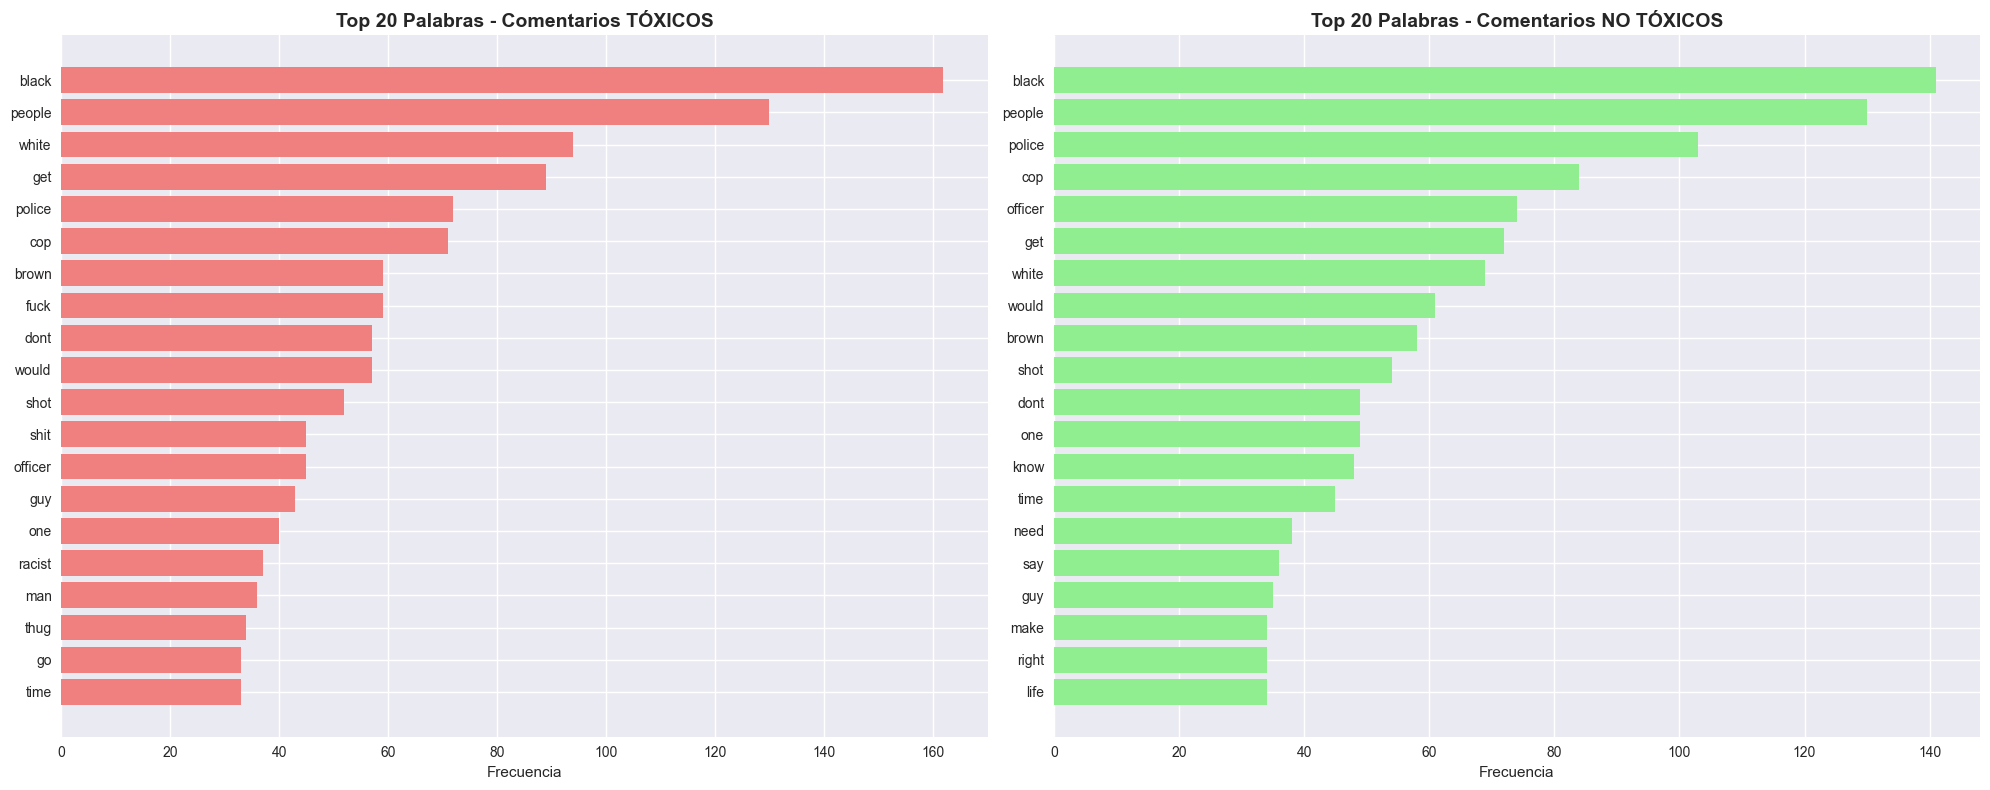

🔥 TOP 10 PALABRAS EN COMENTARIOS TÓXICOS:
  black: 162
  people: 130
  white: 94
  get: 89
  police: 72
  cop: 71
  brown: 59
  fuck: 59
  dont: 57
  would: 57

✅ TOP 10 PALABRAS EN COMENTARIOS NO TÓXICOS:
  black: 141
  people: 130
  police: 103
  cop: 84
  officer: 74
  get: 72
  white: 69
  would: 61
  brown: 58
  shot: 54


In [12]:
from collections import Counter

def get_word_frequency(text_series, top_n=20):
    """Obtener las palabras más frecuentes"""
    all_words = []
    for text in text_series:
        if text:
            all_words.extend(text.split())
    return Counter(all_words).most_common(top_n)

# Analizar palabras más frecuentes por categoría
toxic_texts = df[df['IsToxic'] == True]['text_lemmatized']
non_toxic_texts = df[df['IsToxic'] == False]['text_lemmatized']

toxic_words = get_word_frequency(toxic_texts, 20)
non_toxic_words = get_word_frequency(non_toxic_texts, 20)

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Palabras en comentarios tóxicos
words_t, counts_t = zip(*toxic_words)
axes[0].barh(range(len(words_t)), counts_t, color='lightcoral')
axes[0].set_yticks(range(len(words_t)))
axes[0].set_yticklabels(words_t)
axes[0].set_title('Top 20 Palabras - Comentarios TÓXICOS', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Frecuencia')
axes[0].invert_yaxis()

# Palabras en comentarios no tóxicos
words_nt, counts_nt = zip(*non_toxic_words)
axes[1].barh(range(len(words_nt)), counts_nt, color='lightgreen')
axes[1].set_yticks(range(len(words_nt)))
axes[1].set_yticklabels(words_nt)
axes[1].set_title('Top 20 Palabras - Comentarios NO TÓXICOS', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Frecuencia')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("🔥 TOP 10 PALABRAS EN COMENTARIOS TÓXICOS:")
for word, count in toxic_words[:10]:
    print(f"  {word}: {count}")

print("\n✅ TOP 10 PALABRAS EN COMENTARIOS NO TÓXICOS:")
for word, count in non_toxic_words[:10]:
    print(f"  {word}: {count}")

### Generación de WordClouds

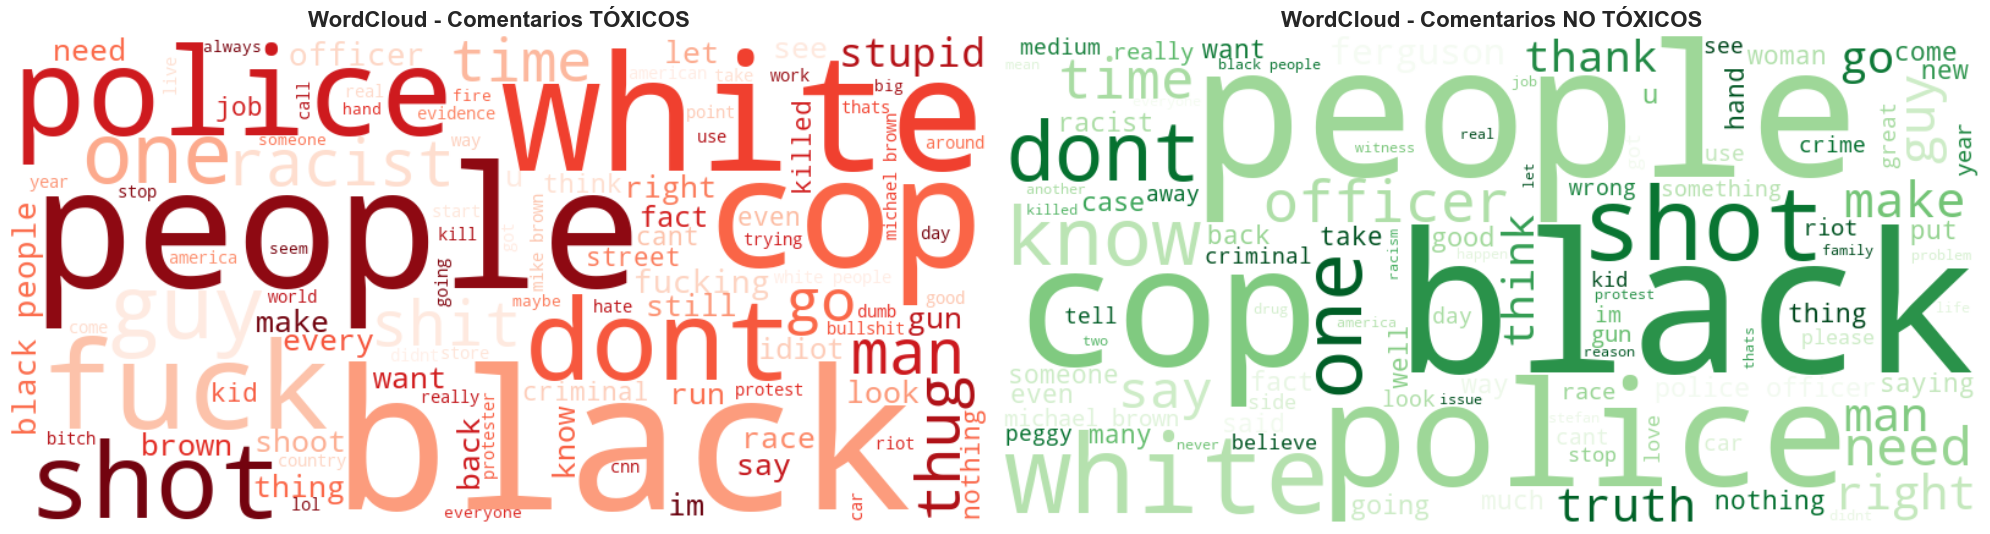

In [13]:
# Combinar textos por categoría
toxic_text_combined = ' '.join(toxic_texts.dropna())
non_toxic_text_combined = ' '.join(non_toxic_texts.dropna())

# Generar WordClouds
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# WordCloud para comentarios tóxicos
wordcloud_toxic = WordCloud(width=800, height=400, 
                           background_color='white',
                           colormap='Reds',
                           max_words=100).generate(toxic_text_combined)

axes[0].imshow(wordcloud_toxic, interpolation='bilinear')
axes[0].set_title('WordCloud - Comentarios TÓXICOS', fontweight='bold', fontsize=16)
axes[0].axis('off')

# WordCloud para comentarios no tóxicos
wordcloud_non_toxic = WordCloud(width=800, height=400,
                                background_color='white',
                                colormap='Greens',
                                max_words=100).generate(non_toxic_text_combined)

axes[1].imshow(wordcloud_non_toxic, interpolation='bilinear')
axes[1].set_title('WordCloud - Comentarios NO TÓXICOS', fontweight='bold', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

**¿Por qué este análisis?**

 - **Patrones léxicos:** Identificar palabras características de cada clase
 - **WordClouds:** Visualización intuitiva de términos importantes
 - **Feature engineering:** Basis para crear características específicas

## ⚙️ Vectorización de Texto

### TF-IDF (Term Frequency-Inverse Document Frequency)

In [14]:
# Preparar diferentes versiones del texto
text_versions = {
    'cleaned': df['text_cleaned'],
    'no_stopwords': df['text_no_stopwords'],
    'stemmed': df['text_stemmed'],
    'lemmatized': df['text_lemmatized']
}

# Configurar TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,          # Top 5000 características
    min_df=2,                   # Palabra debe aparecer en al menos 2 documentos
    max_df=0.95,                # Palabra no debe aparecer en más del 95% de documentos
    ngram_range=(1, 2),         # Unigramas y bigramas
    stop_words='english'        # Stopwords adicionales
)

# Vectorizar texto lemmatizado (mejor balance precisión-velocidad)
X_tfidf = tfidf_vectorizer.fit_transform(df['text_lemmatized'].fillna(''))
y = df['IsToxic'].astype(int)

print("🔤 INFORMACIÓN DE VECTORIZACIÓN TF-IDF:")
print("=" * 50)
print(f"Forma de la matriz: {X_tfidf.shape}")
print(f"Número de características: {len(tfidf_vectorizer.get_feature_names_out())}")
print(f"Sparsity: {(1 - X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1])):.4f}")

# Top características TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = X_tfidf.toarray().mean(axis=0)
top_features = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)

print(f"\n🏆 TOP 15 CARACTERÍSTICAS TF-IDF:")
for feature, score in top_features[:15]:
    print(f"  {feature}: {score:.4f}")

🔤 INFORMACIÓN DE VECTORIZACIÓN TF-IDF:
Forma de la matriz: (1000, 2197)
Número de características: 2197
Sparsity: 0.9942

🏆 TOP 15 CARACTERÍSTICAS TF-IDF:
  people: 0.0307
  black: 0.0301
  police: 0.0215
  cop: 0.0186
  white: 0.0185
  run: 0.0155
  guy: 0.0154
  brown: 0.0148
  dont: 0.0139
  shot: 0.0135
  racist: 0.0128
  officer: 0.0124
  time: 0.0117
  fuck: 0.0117
  need: 0.0112


**¿Por qué TF-IDF?**

- **TF (Term Frequency):** Importancia de la palabra en el documento
- **IDF (Inverse Document Frequency):** Reduce peso de palabras muy comunes
- **Resultado:** Palabras discriminativas obtienen mayor peso

### Bag of Words (CountVectorizer)

In [15]:
# Configurar CountVectorizer
count_vectorizer = CountVectorizer(
    max_features=5000,
    min_df=2,
    max_df=0.95,
    ngram_range=(1, 2),
    stop_words='english'
)

# Vectorizar
X_count = count_vectorizer.fit_transform(df['text_lemmatized'].fillna(''))

print("🔢 INFORMACIÓN DE VECTORIZACIÓN BAG OF WORDS:")
print("=" * 50)
print(f"Forma de la matriz: {X_count.shape}")
print(f"Número de características: {len(count_vectorizer.get_feature_names_out())}")
print(f"Sparsity: {(1 - X_count.nnz / (X_count.shape[0] * X_count.shape[1])):.4f}")

🔢 INFORMACIÓN DE VECTORIZACIÓN BAG OF WORDS:
Forma de la matriz: (1000, 2197)
Número de características: 2197
Sparsity: 0.9942


**¿Bag of Words vs TF-IDF?**

- **Bag of Words:** Cuenta simple de frecuencias
- **TF-IDF:** Normaliza por importancia en el corpus
- **Para toxicidad:** TF-IDF suele funcionar mejor